In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

Acerca del dataset: https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

A partir de muchas features, se trata de entender en que etapa de la diabetes esta el paciente. 

In [2]:
data = load_diabetes()

In [3]:
X, y = load_diabetes(return_X_y=True)
#sklearn tiene una funcionalidad que te separa automaticamente tus datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y)

X.shape

(442, 10)

In [5]:
X_train.shape, X_test.shape

((331, 10), (111, 10))

In [7]:
DecisionTreeRegressor?

* min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node: If int, then consider `min_samples_split` as the minimum number.

* min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  

* max_features : int, float or {"auto", "sqrt", "log2"}, default=None
    The number of features to consider when looking for the best split: If int, then consider `max_features` features at each split.



La complejidad es mayor cuando:
*   aumento max_depth
*   aumento max_features
*   min_samples_split=1
*   min_samples_leaf=1




In [11]:
import math

complexity = []
tr_err = []
te_err = []
# digo que la complejidad del arbol es la cantidad de leaves
# si la min_sample_leaf es chica (=1) entonces va a poder tener arboles mas complejos
# me guardo el error en training y testing (el mse)
for i in range(1,100): # entreno 100 modelos
    model = DecisionTreeRegressor(min_samples_leaf=i).fit(X_train, y_train)
    complexity.append(model.get_n_leaves())
    # le tomo la raiz cuadrada para que tenga la misma unidad que la variable target (tipo varianza)
    tr_err.append(math.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    te_err.append(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))


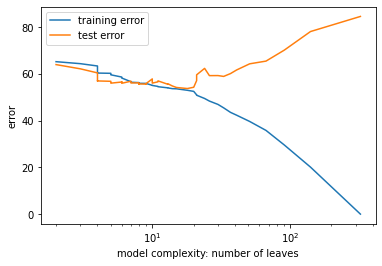

In [12]:
import matplotlib.pyplot as plt

plt.plot(complexity, tr_err, label='training error')
plt.plot(complexity, te_err, label='test error')
plt.xlabel('model complexity: number of leaves')
plt.ylabel('error')
plt.legend(loc='best')
plt.xscale('log')
#mas cantidad de hojas mas complejo

En el momento en que la curva naranja empieza a crecer ahi es cuando tengo que parar. Desde ese momento cuando sigo aumentando en complejidad estoy overfitteando. 